<a href="https://colab.research.google.com/github/WhiteNoyse/gplvm/blob/master/Non_linearDimensionalityReduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Non-linear Dimensionality Reduction using the Gaussian Process Latent Variable Model

### Emmanuelle Dankwa, Natalia Garcia Martin, Deborah Sulem 

## Introduction

 The Gaussian Process Latent Variable Model is a non-linear technique of dimensionality reduction, that can be used in particular when high-dimensional data is assumed to have a low dimensional fully-expressive embedding. It is a unsupervised, non-linear method, taking advantage from the Gaussian Process regression framework, extending the Dual Probabilistic Principal Component Analysis (DPPCA) to non-linear kernels. 

## Methodology



### 1.   Gaussian Process

A Gaussian process (GP) is defined as a collection of random variables, any finite number of which have a joint (multivariate) Gaussian distribution. In Gaussian process regression, we assume that the output $y$ of a function $f$ at input $\boldsymbol x$ can be written as $y = f(\boldsymbol x) + \epsilon$ with $\epsilon \sim N (0, \sigma_\epsilon^2)$. The GP approach is a non-parametric approach, in that it finds a distribution over the possible functions $f(\boldsymbol x)$ that are consistent with the observed data. We assume that the function $f(\boldsymbol x)$ is distributed as a Gaussian process:
$$f(\boldsymbol x) ∼ GP (m(\boldsymbol x), k(\boldsymbol x, \boldsymbol x')).$$

A Gaussian process GP is a distribution over functions and is defined by a mean and a covariance function. The mean function $m(x)$ reflects the expected function value at input $x$: $m(x) = E[f(x)]$. The prior mean function is often set to $m(x) = 0$ in order to avoid expensive posterior computations and only do inference via the covariance function. We can do so by subtracting the (prior) mean from all observations. The covariance function $k(\boldsymbol x, \boldsymbol x^T)$, often referred to as the kernel of the GP, models the dependence between the function values at different input points $\boldsymbol x$ and $\boldsymbol x'$:
$$k(\boldsymbol x, \boldsymbol x')=E\left[\left(f(\boldsymbol x)-m(\boldsymbol x)\right)\left( f(\boldsymbol x')-m(\boldsymbol x')\right)\right].$$

The choice of an appropriate kernel is based on assumptions such as smoothness and likely patterns to be expected in the data. A sensible assumption is usually that the correlation
between two points decays with the distance between the points: closer points are expected to behave more similarly than points which are further away. The Radial Basis Function (RBF) kernel fulfills this assumption and can be used to model smooth and stationary functions. It is defined as 

$$k(\boldsymbol x, \boldsymbol x')= σ^2_f \exp \left( \frac{-|| \boldsymbol x- \boldsymbol x'||^2}{2 \lambda^2} \right).$$

The two hyper-parameters $λ$ (the lengthscale) and $σ^2_f$ (the signal variance) can be varied to increase or reduce the a priori correlation between points and consequentially the variability of the resulting function. Once a mean function and kernel are chosen, we can use the Gaussian process to draw a priori function values, as well as posterior function values conditional upon previous observations <cite>[1]</cite>.


### 2.   Gaussian Process Latent Variable Model (GP-LVM)

#### Linear probabilistic approaches: PPCA and DPPCA

Lawrence <cite>[2, 3]</cite> introduces a novel probabilistic interpretation of PCA referred to as Dual Probabilistic PCA (DPPCA) which turns out to be a special case of a more general class of models referred to as GP-LVMs. Latent variable models usually relate a set of latent variables $X \in \mathbb{R}^{~N \times Q}$  to a set of observed variables $Y \in \mathbb{R}^{~N \times D}$ through a set of parameters by marginalising the latent variables and optimising the parameters. For the purpose of dimensionality reduction, $Q\ll D$. Lawrence (2004) introduces an alternative approach where the parameters are marginalised and the latent variables are then optimised to learn the lower-dimensional representation. 

Probabilistic PCA (PPCA) (Tipping and Bishop, 1999) is formulated as a latent variable model where the maximum likelihood solution of the parameters is found by solving an eigenvalue problem on the data's covariance matrix. We denote the $D$-dimensional data $\{\boldsymbol{y}_n\}_{n=1}^N$  and the associated latent variables $\{\boldsymbol{x}_n\}_{n=1}^N$. The relationship between the latent variables and the data points is given by
$$\boldsymbol{y}_n=\boldsymbol{Wx}_n+\boldsymbol{\eta}_n,$$

where $\boldsymbol{W}\in \mathbb{R}^{~D \times Q}$ specifies the linear relationship between the latent and the data space, and $\boldsymbol{\eta}_n \in \mathbb{R}^{D}$ are sampled independently from a spherical Gaussian distribution with zero mean and covariance $\beta^{-1}\boldsymbol I$: 
$$p(\boldsymbol{\eta}_n) = N (\boldsymbol{\eta}_n|\boldsymbol 0, \beta^{-1}\boldsymbol I).$$

While PPCA puts a (Gaussian) prior distribution on the latent variables, marginalize the likelihood $p(Y|X,W,\beta)$ over the latter and optimize the model parameters $\{W,\beta\}$, Dual Probabilistic PCA (DPPCA) puts a spherical Gaussian prior on $W$:
$$ p(W) = \Pi_{d=1}^D \mathcal{N}(w_d; 0, I_Q)$$
The marginal likelihood of the data is then:
$$ p(Y|X,\beta) = \Pi_{d=1}^D p(y_d|X,\beta) \quad \text{with} \quad p(y_d|X,\beta) = \mathcal{N}(y_d; 0, K) \quad \text{and} \quad K = X X^T + \frac 1 \beta I_Q$$
where $y_d$ is the d-th column of Y. Equivalently, the marginal log-likelihood is thus:
$$ L = - \frac {DN} 2 \log 2\pi - \frac N 2 \log det(K) - \frac 1 2 tr(K^{-1}Y Y^T)$$
Recovering the latent variables $X$ thus only requires to maximize the log-likelihood, solving an eigenvalue problem equivalent to PCA. 

The Gaussian Process Latent Variable Model generalises this probabilistic approach using non-linear kernels $K$ in the latent space, such as the RBF kernel.

####  Non-Linear probabilistic approaches: GP-LVM

As previously seen, the Gaussian Process Latent Variable Model (GP-LVM) is a Gaussian process mapping from a low-dimensional latent space to a high-dimensional observation space with non-linear covariance functions.The model is optimized by computing the derivative of the likelihood with respect to the latent space through a chain rule:
$$\frac{\partial L}{\partial X} = \frac{\partial L}{\partial K} \times \frac{\partial K}{\partial X} \quad \text{with} \quad \frac{\partial L}{\partial K} = K^{-1} Y Y^T K^{-1}  - D K^{-1}  $$
Provided that the derivative of the kernel matrix with respect to the latent variables can be computed, the latent variables as well as the kernel parameters can be optimized via a gradient based optimisation method. However, each step of the latter requires to compute the inverse of the kernel matrix $K^{-1} $, which has a $O(N^3)$ computational cost.

#### Sparse GP-LVM

In [4], Lawrence introduces a sparse approximation of his method in order to reduce the complexity of each iteration of the optimization to $O(k^2 N)$ where $k$ is the size of the subset of points kept in the sparse representation. This method incorporates some inducing variables (or pseudo-inputs) $\boldsymbol{U} \in \mathbf{R}^{k \times D}$ and puts a Gaussian Process prior on each of the columns:
$$p(u_d) = \mathcal{N}(u_d; 0_k, K_{u_d u_d}) $$
where $ K_{u_d u_d}$ is a covariance function constructed using some latent variables $\boldsymbol{X_u}$ which can be a subset of the variables in $\boldsymbol{X}$ .

Let  $\boldsymbol{F} \in \mathbf{R}^{N \times D}$ be the function values of the observations. Each column $u_d$ is then jointly distributed with $f_d$ and:
$$ p(f_d|u_d) = \mathcal{N}(f_d; K_{f_d u_d} K_{u_d u_d}^{-1} u_d, K_{f_d f_d} - K_{f_d u_d} K_{u_d u_d}^{-1} K_{u_d f_d})$$
where $ K_{f_d f_d}$ is the covariance matrix of the inputs  $\boldsymbol{X}$ and $ K_{f_d u_d}$ and $ K_{u_d f_d}$ are the (non-symmetric) covariances matrices between the inducing variables $\boldsymbol{X_u}$ and the latent variables $\boldsymbol{X}$.

The sparse approximations rely on approximated distributions $q(f_d|u_d)$ of $ p(f_d|u_d)$.  Lawrence proposes three methods, the Deterministic Training Conditional, the Fully Independent Training Conditional and the Partially Independent Training Conditional in order to compute an approximated marginal distribution of the function values in the form:
$$q(f_d) =  \mathcal{N}(f_d; 0_N, \boldsymbol{K}')$$
where $\boldsymbol{K}'$ is a product of matrices that includes only the inverse of $K_{u_d u_d}$. The optimization of the likelihood is thus faster, due to the reduced dimension of the latter matrix.

#### Bayesian GP-LVM (Titsias and Lawrence 2010)

Two main issues with the GP-LVM is that it requires to (manually) select the dimensionality Q of the latent space, and that the marginal log-likelihood over the latent variable need to be tractable. To overcome this difficulty, a non-standard variational approach was proposed by Titsias and Lawrence in [5]. They propose a new variational algorithm for the GP-LVM and provide a variational lower bound on the marginal likelihood of the data. This method speeds up the GP-LVM algorithm using the sparse approximation framework and avoids overfitting when the dimension of the latent space is not known a priori. In fact, using a specific kernel, the automatic relevance determination (ARD) squared exponential kernel,  allows to automatically infer the lower space's dimension $Q$:
$$k(x,x') = \sigma_f^2 \exp( - \frac 1 2 \sum_{q = 1}^{Q} \frac {(x_q - x_q')^2}{\lambda_q^2})$$
The difference with the RBF kernel is that the lengthscales $\{\lambda_q\}_{q=1}^Q$ depend on the dimension in the latent space. In particular, if $\lambda_q \rightarrow \infty$, then the dimension $q$ is irrevelant in the observation space. Optimizing the vector of lengthscales $\lambda = (\lambda_1, \dots, \lambda_Q)$ thus automatically peforms a dimensionality selection in the data space

Besides, this method can be used for computing the marginal likelihood of the observations and for inference of missing data.

In the context of Variational Inference, the objective is to compute the marginal likelihood of the data $p(Y) = \int p(Y|X)p(X)dX$, which is intractable in the GP-LVM. Introducing a variational distribution with a factorized Gaussian form $q(X) = \Pi_{n=1}^N \mathcal{N}(x_n; \mu_n, S_n)$ approximating the true posterior $p(Y|X)$, a Jensen's lower bound is given by:

$$ \log p(Y) \geq \int q(X) \log p(Y|X)dX - KL(q||p) = \sum_{d=1}^D \tilde{F}_d(q)  - KL(q||p)$$
using the assumption that the GPs are independent across the features, with $\tilde{F}_d(q) = \int  q(X) \log p(y_d|X)dX$. The KL divergence between the two Gaussian distributions $p(X)$ and $q(X)$ is analytical but the first term can only be lower bounded in a closed-form using a variational approximation.

Similarly to the sparse GP regression framework, this method incorporates the inducing variables and the function values and compute a variational distribution to approximate the true posterior $p(f_d,u_d|X,y_d)$:
$$q(f_d, u_d) = p(f_d|u_d,X)\phi(u_d)$$
The lower variational bound is then maximized with respect to the distribution $\phi(u_d)$, amd then jointly maximized over the model hyperparameters - the kernel parameters $\boldsymbol{\theta} = (\sigma_f, \lambda_1, \dots, \lambda_Q)$ and $\beta$ - and the variational parameters $\{\mu_n, S_n\}_{n=1}^N$ to recover the latent variables. 

 </p>




### 4. Covariate GP-LVM (Martens et al 2018)

### 5. Other Dimensionality Reduction Methods

#### 5.1. Kernel PCA

#### 5.2.Generative Topographic Mapping (GTM)

GTM (Bishop et al., 1998) is a non-linear latent-variable model which maps from a low-dimensional latent space into a high dimensional data space via a topology-preserving map. Specifically,  the GTM employs a  non-linear function which maps from the latent space to a non-Euclidean manifold, $S$, embedded in the observed data space and of the same dimensionality as the latent space.



Consider a non-linear function $\phi(\boldsymbol{x};W)$ from the latent space, $X$ to the data space $Y$, where $W$ is a parameter matrix of weights. Let $\phi(\boldsymbol{x};W) = \boldsymbol{q}$. Then, the distribution of $\boldsymbol{y}$ given $\boldsymbol{x}$ and $W$ is chosen to be Gaussian : 


$$p(\boldsymbol{y}|\boldsymbol{x}, \boldsymbol{W}, \beta) = \left(\frac{\beta}{2\pi}\right)^{D/2} \exp \{-\dfrac{\beta}{2} ||\boldsymbol{q}-\boldsymbol{y}|| \}$$



where $\beta^{-1}$ is the variance of the distribution. Integrating over $x$,  the marginal likelihood of the observed data for some  given value of $\boldsymbol{W}$, is obtained as: 

$$p(\boldsymbol{y}|\boldsymbol{W}, \beta) = \int p(\boldsymbol{y}|\boldsymbol{x}, \boldsymbol{W}, \beta) p(\boldsymbol{x})d\boldsymbol{x}.$$
To enable analytical evaluation of the above integral, the prior distribution of $x$ is chosen to have the form $p(\boldsymbol{x})=\frac{1}{K}\sum_{i=1}^{K}\delta(\boldsymbol{x}-\boldsymbol{x_i})$, which expresses the sum of $K$ delta functions, each of which has a center, $x_i$ on a uniform discrete grid. (An empirical test by Lawrence (2005) showed that the performance of GTM is partly dependent on the grid size). Assuming that $\boldsymbol{y}_n$ is  i.i.d, the  log likelihood can then be expressed as

$$\boldsymbol L =   \sum_{n=1}^{N} ln\{\dfrac{1}{K}\sum_{i=1}^{K}p(\boldsymbol{y}_n|\boldsymbol{x}_{i}, \boldsymbol{W}, \beta)\}$$

The Expectation-Maximisation (EM) algorithm is employed in the optimisation of the model parameters, $W$ and $\beta$.

A useful modification to the standard GTM which exploits the kernel trick, has been developed by Olier et al. (2010). The new method, known as  kernel GTM(KGTM) has been shown to outperform the original GTM in the visualization and clustering of more complex  data structures like strings and graphs. In this study however, we employ the original GTM due to the relative simplicity of the datasets used.


#### 5.3 T-distribution Stochastic Neighbour Embedding (tSNE)

The tSNE method (Maaten and Hinton, 2008)   for dimensionality reduction was developed  as an extension to the stochastic neighbour embedding (SNE) method proposed by Hinton and Roweis (2002).

The SNE framework interprets the distances between data points in a high-dimensional space as conditional probabilities. Following the notation in Maaten and Hinton (2008), for two points $\boldsymbol y _i$ and $\boldsymbol y_j$ in the observed data set, we denote by $p_{j|i}$ the probability that  $\boldsymbol y_j$ "will be" the neighbor of $\boldsymbol y_i$, given the value of $\boldsymbol y_i$.  It can thus be naturally interpreted that if $p_{j|i}$ is large, then the two points are located close to each other in the data space. The conditional probability is Gaussian with center $\boldsymbol y_i$ and variance $\sigma^2$:
$$p_{j|i}= \dfrac{\exp(||\boldsymbol y_i-\boldsymbol y_j||^2/2\sigma_i^2)}{\sum_{k\neq i}\exp(||\boldsymbol y_i-\boldsymbol y_k||^2/2\sigma_i^2)}. $$

See for details on choice of $\sigma^2$.

#### 5.4 Multi-dimensional Scaling (MDS)

Multi-dimensional scaling is the term used to describe the broad class of dimension reduction methods which deduce the location of points on a low dimensional space using only some measure of the proximity (similarity) between those points in a high dimensional space (Kruskal and Wish, 1978). Thus, in the visualisation map produced by MDS, points which have a smaller proximity value are  located close to each other and less similar points  are  far apart.

The general concept of MDS can be explained as follows: let $\delta_{ij}$ denote the  proximity value between points $i$ and $j$, for all $i,j \in (1,...,N)$, where $N$ is the sample size.  Then, the values of  $\delta_{ij}$ form an $N\times N$ matrix, $\Lambda$. Clearly,  $\delta_{ii}=0$ for all $i$.  Given $\Lambda$, MDS seeks to find a set  of vectors $(\boldsymbol x_1,...,\boldsymbol x_N)$  such that  the stress,

$$A = \sqrt{\dfrac{\sum_i \sum_j[f(\boldsymbol x_i, \boldsymbol x_j)- \delta_{ij}]^2}{\sum_i \sum_j \delta_{ij}^2}}. $$

is minimised.  The denominator in the above expression acts as a scale factor, constraining $A$  to the set $[0,1]$ ( Kruskal and Wish, 1978).  The transformation $f$ is chosen to be  monotonic, in order to preseve the ordering in the original data. 

The two types of MDS techniques - metric (classic) and non-metric -  differ in terms of the manner in which $f$ is defined, which is in turn based on the type of data being considered (i.e. metric or non-metric data). In this report, we employ the metric MDS for all comparisons since we make use of non-binary data. 





#### 5.3. Autoencoders

## Results

### Comparison metrics

As performed in the comparative review by Van der Maaten, the different techniques of dimensionality reduction are tested on simulated and real datasets and their performance is measured using the classification error of the one-nearest neighbor classifier and two measures of the preservation of the local structure, the trustworthiness and the continuity measures, defined as following:

$$ T(k) = 1 - \frac 2 {nk(2n-3k-1)} \sum_{n=1}^N \sum_{j \in U_n^{(k)}} r(n,j) - k $$ 
$$ C(k) = 1 - \frac 2 {nk(2n-3k-1)} \sum_{n=1}^N \sum_{j \in V_n^{(k)}} \hat{r}(n,j) - k $$
where $ U_n^{(k)}$ (resp.  $V_n^{(k)}$) is the set of points that are amongst the $k$ nearest neighbors of the point $n$ in the latent space (resp. data space) but not in the data space (resp. latent space) and $r(n,j)$ (resp.  $\hat{r}(n,j)$) is the rank of the point $j$ in the neighborhood of $n$ in the data space (resp. latent space).

The trustworthiness thus penalizes the points that are "too close" in the latent space, compared to the original one, whereas the continuity penalizes the points that are "too far away" in the latent space. 

We also compare the computation time of the methods.

In [3]:
#!git clone https://github.com/WhiteNoyse/gplvm.git

fatal: destination path 'gplvm' already exists and is not an empty directory.


In [4]:
#!git clone https://github.com/WhiteNoyse/GPy.git

fatal: destination path 'GPy' already exists and is not an empty directory.


In [4]:
import GPy
import pods

from utils import *

### Swiss roll data set

In this simulated dataset, each observation $y_n \in \mathbf{R}^3$ is generated according to the following process:
$$ p_n, q_n \sim \mathcal{U}[0,1]$$
$$ t_n = \frac {3 \pi} 2 (1 + 2p_n)$$
$$ y_n = (t_n\cos t_n, t_n\sin t_n, 30 q_n) + \epsilon_n$$
where $\epsilon_n \sim \mathcal{N}(0,\sigma^2)$. <br/>

The intrisic dimensionality is then $Q = 2$ and we separate the data points into 2 classes according to the following rule:
$$ c_n = \lfloor t_n / 2 \rfloor + \lfloor 30 q_n / 12 \rfloor + 2 \mod 2 $$
We use $N = 1000$ data points.

We compare the following methods: <br/>
(a) the simple PCA <br/>
(b) the Dual Probabilistic PCA (GP-LVM with a linear kernel) <br/>
(c) the GP-LVM with the RBF kernel with bias and white noise <br/>
(d) the sparse GP-LVM with the previous kernel and p = 30 inducing variables <br/>
(e) the Bayesian GP-LVM with the ARD kernel and p = 30 <br/>

We also choose $k = 5$ to compute the trustworthiness and the continuity measures.

| | PCA        | DPPCA | GP-LVM           | Sparse GP-LVM | Bayesian GP-LVM |
| ------------- |:-------------:| -----:| 
| classification error (%)| 27.7 | 26.7 | 8.0 |8.4| 7.0 |
| trustworthiness    | 0.8851   | 0.8873 | 0.9967 | 0.9975| 0.9887 |
| continuity | 0.9988| 0.9960 | 0.9956|0.9792| 0.9700 |
| wall time | 115 ms | 42 s | 8 min 38 s | 2 min 12 s | 9 min 53 s|


In [ ]:
from IPython.display import HTML, display
display(HTML("<table><tr><td><img src='swiss_roll_3d.png'></td><td><img src='swiss_roll_2d.png'></td></tr></table>"))

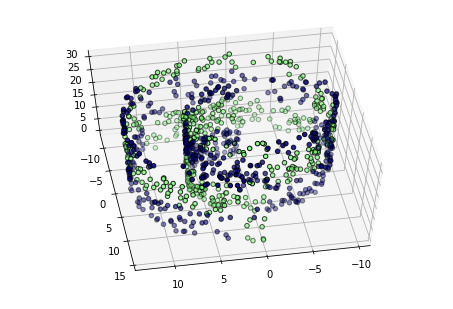

In [61]:
data_sr, lab_sr, x_1, x_2 = swiss_roll_generator(1000, sigma=0.05)

fig = plt.figure()
ax = p3.Axes3D(fig)
ax.view_init(60, 80)
for l in np.unique(lab_sr):
    ax.scatter(data_sr[lab_sr == l, 0], data_sr[lab_sr == l, 1], data_sr[lab_sr == l, 2],
               color=plt.cm.jet(np.float(l) / np.max(lab_sr + 1)),
               s=20, edgecolor='k')

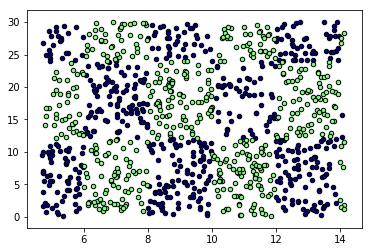

In [62]:
fig = plt.figure()
for l in np.unique(lab_sr):
    plt.scatter(x_1[lab_sr == l], x_2[lab_sr == l],
               color=plt.cm.jet(np.float(l) / np.max(lab_sr + 1)),
               s=20, edgecolor='k')
plt.show()

#### Simple PCA

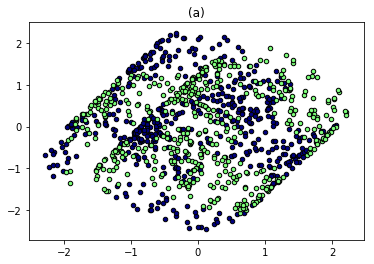

CPU times: user 167 ms, sys: 115 ms, total: 282 ms
Wall time: 107 ms


In [63]:
%%time
from GPy.util.initialization import initialize_latent
X, _ = initialize_latent('PCA', 2, data_sr)

fig_pca = plt.figure()
for l in np.unique(lab_sr):
    plt.scatter(X[lab_sr == l, 0], X[lab_sr == l, 1],
               color=plt.cm.jet(np.float(l) / np.max(lab_sr + 1)),
               s=20, edgecolor='k')
plt.title("(a)")
plt.show()

In [64]:
err_pca = classification_error(X,lab_sr)
print("PCA: error ",err_pca," Truthworthiness and continuity ",truthworthiness(X,data_sr,k=5))

PCA: error  0.239  Truthworthiness and continuity  (0.867578629032258, 0.9958917338709677)


CPU times: user 2min 4s, sys: 3min 22s, total: 5min 26s
Wall time: 41.9 s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


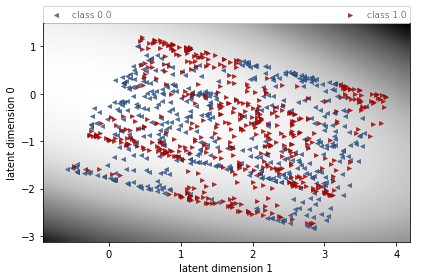

In [17]:
%%time
# Check that we have the same result with the probabilistic approach (just takes longer)
kernel = Linear(2)
m1 = GPy.models.GPLVM(data_sr, 2, kernel=kernel)
m1.data_labels = lab_sr
m1.optimize('scg')
m1.plot_latent(labels=m1.data_labels)

In [18]:
err_pca = classification_error(m1.X,lab_sr)
print("GP-LVM: error ",err_pca," Truthworthiness and continuity ",truthworthiness(m1.X,data_sr,k=5))

GP-LVM: error  0.267  Truthworthiness and continuity  (0.8873715725806451, 0.9956344758064516)


PCA gives quite bad classification results...

#### GP-LVM with RBF kernel

CPU times: user 29min 31s, sys: 35min 50s, total: 1h 5min 22s
Wall time: 8min 44s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


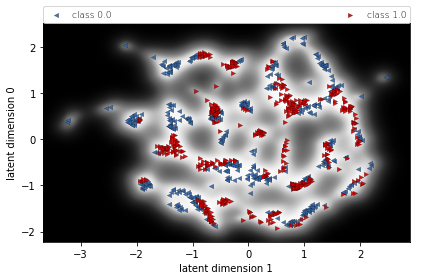

In [19]:
%%time
kernel = GPy.kern.RBF(2, np.exp(-1)) + GPy.kern.Bias(2, np.exp(-1)) +  GPy.kern.White(2, np.exp(-1))
m2 = GPy.models.GPLVM(data_sr, 2, kernel=kernel)
m2.data_labels = lab_sr
m2.optimize('scg')
p2 = m2.plot_latent(labels=m2.data_labels)
p2

In [20]:
err_RBF = classification_error(m2.X,lab_sr)
print("GP-LVM: error ",err_RBF," Truthworthiness and continuity ",truthworthiness(m2.X,data_sr,k=5))

GP-LVM: error  0.08  Truthworthiness and continuity  (0.9967052419354838, 0.9792060483870968)


#### Sparse GP-LVM

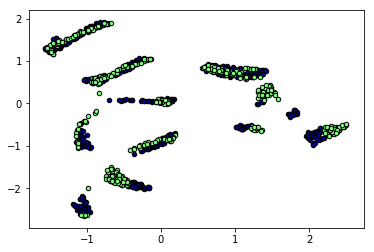

CPU times: user 7min 23s, sys: 13min 15s, total: 20min 39s
Wall time: 2min 38s


In [25]:
%%time

kernel = GPy.kern.RBF(2, np.exp(-1)) + GPy.kern.Bias(2, np.exp(-1)) + GPy.kern.White(2, np.exp(-1))
m3 = GPy.models.SparseGPLVM(data_sr, 2, kernel=kernel, num_inducing=30)
m3.data_labels = lab_sr
m3.optimize('scg')
from GPy.plotting.gpy_plot.plot_util import get_x_y_var
X_3 = get_x_y_var(m3)[0]
fig = plt.figure()
for l in np.unique(lab_sr):
    plt.scatter(X_3[lab_sr == l, 0], X_3[lab_sr == l, 1],
               color=plt.cm.jet(np.float(l) / np.max(lab_sr + 1)),
               s=20, edgecolor='k')
plt.show()

In [26]:
err_sp = classification_error(m3.X,lab_sr)
print("Sparse GP-LVM: error ",err_sp," Truthworthiness and continuity ",truthworthiness(m3.X,data_sr,k=5))

Sparse GP-LVM: error  0.084  Truthworthiness and continuity  (0.997510685483871, 0.9666921370967742)


#### Bayesian GP-LVM

CPU times: user 24min 44s, sys: 48min 55s, total: 1h 13min 40s
Wall time: 9min 53s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


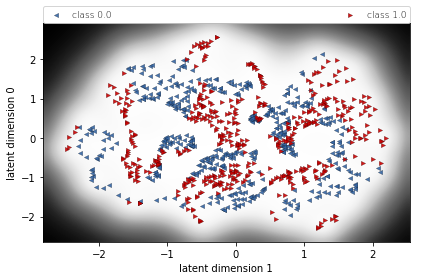

In [23]:
%%time
kernel = GPy.kern.RBF(2, ARD=True) + GPy.kern.Bias(2, np.exp(-2)) + GPy.kern.White(2, np.exp(-2))
m4 = GPy.models.BayesianGPLVM(data_sr, 2, init='PCA', num_inducing=50, kernel=kernel)
m4.data_labels = lab_sr
m4.optimize('scg')
m4.plot_latent(labels=m4.data_labels)

In [24]:
from GPy.plotting.gpy_plot.plot_util import get_x_y_var
X_4 = get_x_y_var(m4)[0]
err_bay = classification_error(X_4,lab_sr)
print("Bayesian GP-LVM: error ",err_bay," Truthworthiness and continuity ",truthworthiness(X_4,data_sr,k=5))

Bayesian GP-LVM: error  0.07  Truthworthiness and continuity  (0.9987818548387096, 0.970001814516129)


### Oil dataset (real dataset)

In this real dataset, the observation $y_n \in \mathbf{R}^12$ have a label corresponding to three types of flows: homogeneous, annular or stratified. We use $N = 1000$ data points. <br/>

The intrisic dimensionality is then $Q = 2$ and we separate the data points into 2 classes according to the following rule:
$$ c_n = \lfloor t_n / 2 \rfloor + \lfloor 30 q_n / 12 \rfloor + 2 \mod 2 $$


We compare the following methods: <br/>
(a) the simple PCA <br/>
(b) the Dual Probabilistic PCA (GP-LVM with a linear kernel) <br/>
(c) the GP-LVM with the RBF kernel with bias and white noise <br/>
(d) the sparse GP-LVM with the previous kernel and p = 30 inducing variables <br/>
(e) the Bayesian GP-LVM with the ARD kernel and p = 30 <br/>

We also choose $k = 5$ to compute the trustworthiness and the continuity measures.

| | PCA | DPPCA |       GP-LVM           | Sparse GP-LVM | Bayesian GP-LVM |
| ------------- |:-------------:| -----:| 
| classification error (%)| 27 | 26.5 | 0.0 | 0.0 | 0.1 |
| trustworthiness    | 0.9207 | 0.9195 | 0.9849 | 0.9969| 0.9971|
| continuity | 0.9921 | 0.9912 |0.9993 | 0.9769 | 0.9975 |
| computation time | 350 ms | 8.06 s | 8 min 38 s | 2 min 24 s | 3 min 34 s |

In [26]:
N = 1000
data_oil = pods.datasets.oil()
Y = data_oil['X'][:N]
Y = Y - Y.mean(0)
Y /= Y.std(0)
labels = data_oil['Y'].argmax(axis=1)[:N]

In [37]:
#labels[np.where(labels==0)] = "Homogeneous"
labels_2 = labels.tolist()
labels_2[np.where(labels==0)[0][:]] = "hello"
labels_2

TypeError: only integer scalar arrays can be converted to a scalar index

In [58]:
labels_2 = np.array(["            "]*1000)
labels_2[np.where(labels==0)] = 'Homogeneous'
labels_2[np.where(labels==1)] = 'Annular'
labels_2[np.where(labels==2)] = 'Stratified'

In [59]:
labels_2

array(['Homogeneous', 'Annular', 'Homogeneous', 'Annular', 'Stratified',
       'Annular', 'Stratified', 'Stratified', 'Stratified', 'Stratified',
       'Annular', 'Annular', 'Homogeneous', 'Stratified', 'Annular',
       'Homogeneous', 'Stratified', 'Homogeneous', 'Homogeneous',
       'Annular', 'Annular', 'Homogeneous', 'Stratified', 'Stratified',
       'Annular', 'Annular', 'Annular', 'Annular', 'Stratified',
       'Homogeneous', 'Stratified', 'Stratified', 'Annular', 'Annular',
       'Annular', 'Annular', 'Homogeneous', 'Homogeneous', 'Annular',
       'Homogeneous', 'Homogeneous', 'Stratified', 'Stratified',
       'Annular', 'Homogeneous', 'Stratified', 'Annular', 'Homogeneous',
       'Stratified', 'Homogeneous', 'Annular', 'Annular', 'Annular',
       'Stratified', 'Stratified', 'Stratified', 'Homogeneous',
       'Stratified', 'Stratified', 'Annular', 'Homogeneous', 'Stratified',
       'Annular', 'Stratified', 'Homogeneous', 'Stratified', 'Annular',
       'Annular', 'St

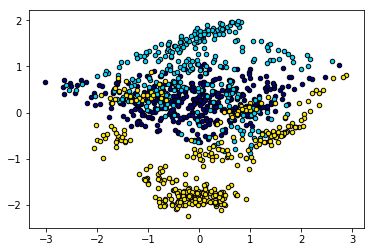

PCA: error  0.27  Truthworthiness and continuity  (0.9207439516129032, 0.9920891129032258)
CPU times: user 643 ms, sys: 826 ms, total: 1.47 s
Wall time: 339 ms


In [28]:
%%time
from GPy.util.initialization import initialize_latent
X_oil, _ = initialize_latent('PCA', 2, Y)

fig = plt.figure()
for l in np.unique(labels):
    plt.scatter(X_oil[labels == l, 0], X_oil[labels == l, 1],
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
plt.show()
err_pca = classification_error(X_oil,labels)
print("PCA: error ",err_pca," Truthworthiness and continuity ",truthworthiness(X_oil,Y,k=5))

CPU times: user 27.5 s, sys: 41.2 s, total: 1min 8s
Wall time: 8.83 s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


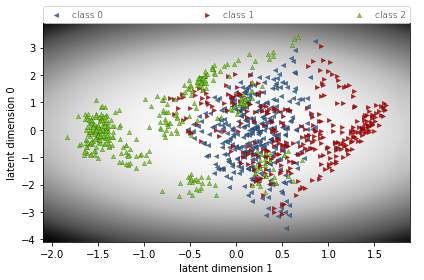

In [29]:
%%time
# PCA
kernel = Linear(2)
m1 = GPy.models.GPLVM(Y, 2, kernel=kernel)
m1.data_labels = labels
m1.optimize('scg')
m1.plot_latent(labels=m1.data_labels)


In [30]:
err_pca = classification_error(m1.X,labels)
print("PCA: error ",err_pca," Truthworthiness and continuity ",truthworthiness(m1.X,Y,k=5))

PCA: error  0.265  Truthworthiness and continuity  (0.9195072580645162, 0.9915963709677419)


CPU times: user 31min 3s, sys: 35min 21s, total: 1h 6min 25s
Wall time: 8min 46s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


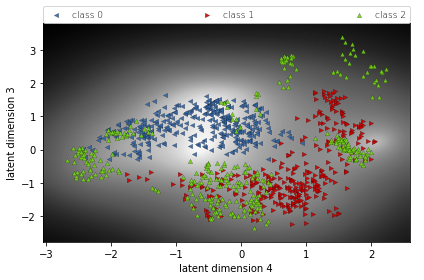

In [36]:
%%time
# GP-LVM with RBF kernel
kernel = GPy.kern.RBF(5) + GPy.kern.Bias(5, np.exp(-1)) + GPy.kern.White(5, np.exp(-1))
m2 = GPy.models.GPLVM(Y, 5, kernel=kernel)
m2.data_labels = labels
m2.optimize('scg')
m2.plot_latent(labels=m2.data_labels)

In [37]:
err_gp = classification_error(m2.X,labels)
print("GP-LVM: error ",err_gp," Truthworthiness and continuity ",truthworthiness(m2.X,Y,k=5))

GP-LVM: error  0.0  Truthworthiness and continuity  (0.9849201612903226, 0.97686875)


In [38]:
%%time
# sparse GP-LVM
kernel = GPy.kern.RBF(5) + GPy.kern.Bias(5, np.exp(-1)) + GPy.kern.White(5, np.exp(-1))
m3 = GPy.models.SparseGPLVM(Y, 5, kernel=kernel, num_inducing=40)
m3.data_labels = labels
m3.optimize('scg')

err_sp = classification_error(m3.X,labels)
print("Sparse GP-LVM: error ",err_sp," Truthworthiness and continuity ",truthworthiness(m3.X,Y,k=5))

 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/rbf.py:54: RuntimeWarning:invalid value encountered in multiply


Sparse GP-LVM: error  0.0  Truthworthiness and continuity  (0.9968790322580645, 0.9948514112903226)
CPU times: user 6min 24s, sys: 11min 50s, total: 18min 14s
Wall time: 2min 24s


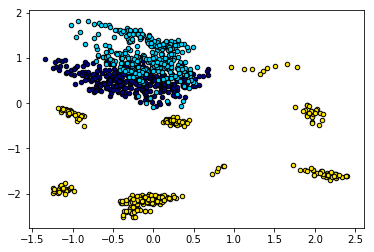

In [39]:
from GPy.plotting.gpy_plot.plot_util import get_x_y_var
X_3 = get_x_y_var(m3)[0]
fig = plt.figure()
for l in np.unique(labels):
    plt.scatter(X_3[labels == l, 0], X_3[labels == l, 1],
               color=plt.cm.jet(np.float(l) / np.max(labels + 1)),
               s=20, edgecolor='k')
plt.show()

 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:166: RuntimeWarning:overflow encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/stationary.py:138: RuntimeWarning:invalid value encountered in add
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:30: RuntimeWarning:divide by zero encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:44: RuntimeWarning:divide by zero encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:45: RuntimeWarning:divide by zero encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:45: RuntimeWarning:invalid value encountered in true_divide
 /homes/sulem/.local/lib/python3.6/site-packages/GPy/kern/src/psi_comp/rbf_psi_comp.py:48: RuntimeWarning:overflow encountered in multiply
 /homes/s

Bayesian GP-LVM: error  0.001  Truthworthiness and continuity  (0.997055443548387, 0.9975181451612903)
CPU times: user 9min 2s, sys: 19min 4s, total: 28min 6s
Wall time: 3min 34s


 /usr/lib64/python3.6/site-packages/matplotlib/figure.py:2299: UserWarning:This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


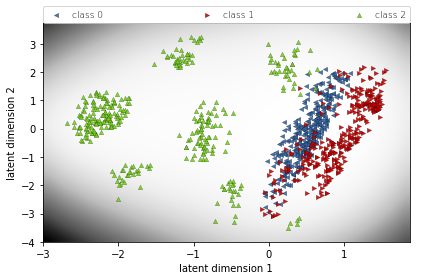

In [40]:
%%time
kernel = GPy.kern.RBF(10, ARD=True) + GPy.kern.Bias(10, np.exp(-2)) + GPy.kern.White(10, np.exp(-2))
m4 = GPy.models.BayesianGPLVM(Y, 10, init='PCA', num_inducing=40, kernel=kernel)
m4.data_labels = labels
m4.optimize('scg')
m4.plot_latent(labels=m4.data_labels)
from GPy.plotting.gpy_plot.plot_util import get_x_y_var
X_4 = get_x_y_var(m4)[0]
err_bay = classification_error(X_4,labels)
print("Bayesian GP-LVM: error ",err_bay," Truthworthiness and continuity ",truthworthiness(X_4,Y,k=5))

In [ ]:
GPy.examples.dimensionality_reduction.bgplvm_oil()

###Visualization with  GTM

We compared the performance of the GPLVM method with GTM using the oil data set.......

In [ ]:
!pip install ugtm
import ugtm
from ugtm import eGTM
import pandas

#Importing OilData   (1000x12)       #Really would love a better way to do this!

from google.colab import files
files.upload()


#Renaming data file

data = 'OilData.txt'


#Transforming from .txt format to data frame

df = pandas.read_table(data, delim_whitespace=True, names=('A', 'B', 'C', 'D','E','F','G','H', 'I', 'J','K', 'L'))

df

In [ ]:
#Fitting GTM

transformed2 = eGTM().fit(df).transform(df)

#Initialising with PCA

from sklearn.decomposition import PCA
pca1 = PCA(n_components=1)
y = pca1.fit_transform(df)

#Visualizing the data

import altair as alt


df2 = pandas.DataFrame(transformed2, columns=["x1", "x2"])

df2["label"] = y
alt.Chart(df2).mark_circle().encode(
x='x1',y='x2',
color=alt.Color('label:N',
                    scale=alt.Scale(scheme='viridis'), legend =None),
tooltip=["x1", "x2", 'label:N']
).properties(title="GTM projection of Oil Data").interactive()

### Dimensionality Reduction on the Oil Flow Dataset using Multilayer Autoencoders

### Dimensionality Reduction on the Oil Flow Dataset using Kernel PCA

##  Discussion

## References

  [1]: Eric Schulz, Maarten Speekenbrink, Andreas Krause. A tutorial on Gaussian process regression: Modelling, exploring, and exploiting functions. Journal of Mathematical Psychology 85, 1-16, 2018.
  
   [2]: Neil Lawrence. Gaussian process latent variable models for visualisation of high dimensional data. Advances in neural information processing systems, 329-336, 2004.
  
  [3]: Neil Lawrence. Probabilistic non-linear principal component analysis with Gaussian process latent variable models. Journal of machine learning research 6 (Nov), 1783-1816, 2005.
  
  [4]: Neil Lawrence. Learning for Larger Datasets with the Gaussian Process Latent Variable Model.  Proceedings of the Eleventh International Conference on Artificial Intelligence and Statistics, PMLR 2:243-250, 2007
  
  [5]: Michalis K. Titsias, Neil Lawrence. Bayesian Gaussian process latent variable models. Proceedings of the Thirteenth International Conference on Artificial Intelligence and Statistics, PMLR 9:844-851, 2010.
  
  [6]: Laurens Van Der Maaten, Eric Postma, Jaap Van den Herik. Dimensionality Reduction: a Comparative Review. J Mach Learn Res, 10: 66-71, 2009.
  
  
  
  Christopher M. Bishop, Marcus Svensén and Christopher Williams. GTM: the Generative Topographic Mapping.  Neural Computation, 10(1):215-234, 1998.
   
   Gaspar, H.A., 2018. ugtm: A Python Package for Data Modeling and Visualization Using Generative Topographic Mapping. Journal of Open Research Software, 6(1), p.26. DOI: http://doi.org/10.5334/jors.235
   
   Laurens Van Der Maaten, Eric Postma, Jaap Van den Herik. Dimensionality Reduction: a Comparative Review. J Mach Learn Res, 10: 66-71, 2009.
  
  Yarin Gal, Mark Van Der Wilk, Carl Edward Rasmussen. Distributed variational inference in sparse Gaussian process regression and latent variable models. Advances in neural information processing systems, 3257-3265, 2014.
  
  De G Matthews, G Alexander, Mark Van Der Wilk, Tom Nickson, Keisuke Fujii, Alexis Boukouvalas, Pablo León-Villagrá, Zoubin Ghahramani, James Hensman. GPflow: A Gaussian process library using TensorFlow. The Journal of Machine Learning Research 18 (1), 1299-1304, 2017.
  
  Sumon Ahmed, Magnus Rattray, Alexis Boukouvalas. GrandPrix: Scaling up the Bayesian GPLVM for single-cell data. Bioinformatics 35 (1), 47-54, 2018.
  
 Covariate Gaussian Process Latent Variable Models. Kaspar Märtens, Kieran R Campbell, Christopher Yau. arXiv preprint arXiv:1810.06983, 2018.
 
 Olier, Iván, Alfredo Vellido and Jesús Giraldo. “Kernel generative topographic mapping.” ESANN (2010).
 
 Maaten, Laurens van der, and Geoffrey Hinton. "Visualizing data using t-SNE." Journal of machine learning research 9.Nov (2008): 2579-2605.
 
   
  Kruskal, Joseph B.; Wish, Myron. " Multidimensional Scaling". Sage University Papers Series. Quantitative Applications in the Social Sciences ; No. 07-011, 1978.
 
 
